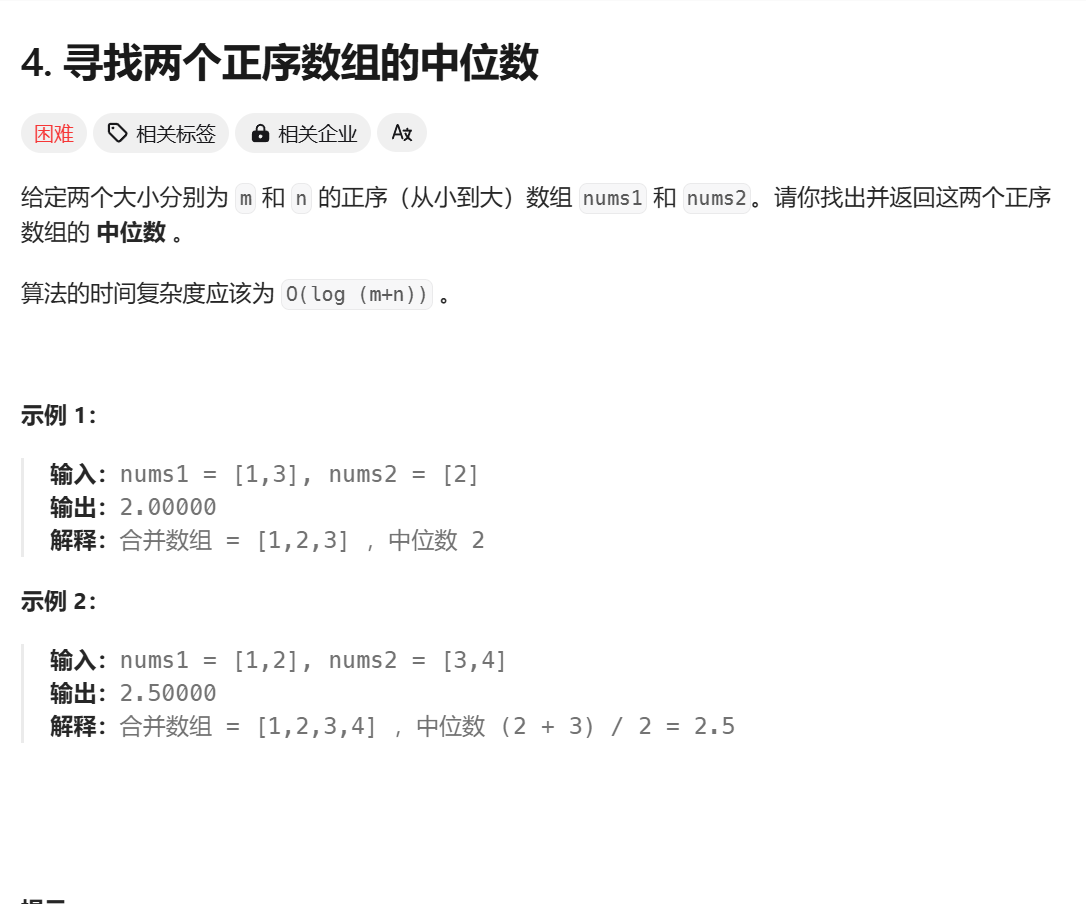

## 很妙的想法
- 因为它们都是有序的
- 划分出 (n1+1)//2 与 （n2 + 1）// 2  
  - 如果长度为奇数那么就是左边多一个
  - 如果长度为偶数那么就是正好一半
  - 这样就能得到两个数列的两个一半小数列
  - 中位数就是这两个小数列的最大值或者是两个最大值除以二

In [ ]:
from typing import List

class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        size1 = len(nums1)
        size2 = len(nums2)

        # 要比较
        # 先比较 各自左边第一个 
        # 如果是 奇数组 直接最大就是答案
        # 还有直接是空数组的！
        def odd(size1, size2):

            mid1, mid2 = ((size1 + 1) // 2) - 1, ((size2 + 1) // 2) - 1            
            if size1 == 0:
                return float(nums2[mid2])
            if size2 == 0:
                return float(nums1[mid1])
            if nums1[mid1] >= nums2[mid2]:
                return float(nums1[mid1])
            else:
                return float(nums2[mid2])
            
        # 如果是偶数
        # 先比较出一个最大值
        # 然后应该是左边的最小值作为我们的另一个中位数
        # 但是要小心只有一个数字的数组是只能取另外一个数组最小值
        # 同时还是有 两个数组都只有一个元素的
        # 还有直接是一个空的
        def even(size1, size2):
            if size1 == size2 == 1:
                return float((nums1[0] + nums2[0]) / 2)
            
            mid1, mid2 = ((size1 + 1) // 2) - 1, ((size2 + 1) // 2) - 1
            if size1 == 0:
                return float((nums2[mid2] + nums2[mid2 + 1])/2)
            if size2 == 0: 
                return float((nums1[mid1] + nums1[mid1 + 1])/2)
            
            if nums1[mid1] >= nums2[mid2]:
                max1 = nums1[mid1]
                if size1 == 1:
                    min2 = nums2[mid2 + 1]
                elif nums1[mid1 + 1] < nums2[mid2 + 1]:
                    min2 = nums1[mid1 + 1]
                else:
                    min2 = nums2[mid2 + 1]
            else:
                max1 = nums2[mid2]
                if size2 == 1:
                    min2 = nums1[mid1 + 1]
                elif nums1[mid1 + 1] < nums2[mid2 + 1]:
                    min2 = nums1[mid1 + 1]
                else:
                    min2 = nums2[mid2 + 1]
                
            return float((max1 + min2) / 2)                        

        if (size1 + size2) % 2 == 0:
            return even(size1, size2)
        else:
            return odd(size1, size2)
        

a = Solution()
a.findMedianSortedArrays()


In [ ]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        n1 = len(nums1)
        n2 = len(nums2)
        if n1 > n2:
            return self.findMedianSortedArrays(nums2, nums1)

        k = (n1 + n2 + 1) // 2
        left = 0
        right = n1
        while left < right:
            m1 = left + (right - left) // 2    # 在 nums1 中取前 m1 个元素
            m2 = k - m1                        # 在 nums2 中取前 m2 个元素
            if nums1[m1] < nums2[m2 - 1]:      # 说明 nums1 中所元素不够多，其实不然，不是这么想的。是因为划分的左边所有元素要小于右边的所有元素，
                                               # 自然有nums1[m1] < nums[m1 - 1] 那么只要nums1[m1] > nums[m2 - 1](这个是2的左边最大的) 
                                               # 如果不是说明没有满足左边的严格小于右边的那么 加大nums1[m1] !
                left = m1 + 1
            else:
                right = m1                    

        m1 = left
        m2 = k - m1
        
        c1 = max(float('-inf') if m1 <= 0 else nums1[m1 - 1], float('-inf') if m2 <= 0 else nums2[m2 - 1])
        if (n1 + n2) % 2 == 1:
            return c1

        c2 = min(float('inf') if m1 >= n1 else nums1[m1], float('inf') if m2 >= n2 else nums2[m2])

        return (c1 + c2) / 2